### 1.EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [60]:
df = pd.read_csv('cars-dataset.csv')

In [61]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [63]:
df["hp"]=df["hp"].replace('?',np.nan)
df["hp"]=pd.to_numeric(df["hp"],downcast='float')
df['hp'] = (df['hp']).replace(np.nan, df['hp'].median())


In [64]:
df.shape

(398, 8)

In [65]:
df['car name']=df['car name'].astype('category')
df['car name']=df['car name'].cat.codes

In [66]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,49,8,307.0,130.0,3504,12.0,70,18.0
1,36,8,350.0,165.0,3693,11.5,70,15.0
2,231,8,318.0,150.0,3436,11.0,70,18.0
3,14,8,304.0,150.0,3433,12.0,70,16.0
4,161,8,302.0,140.0,3449,10.5,70,17.0


### 2.Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


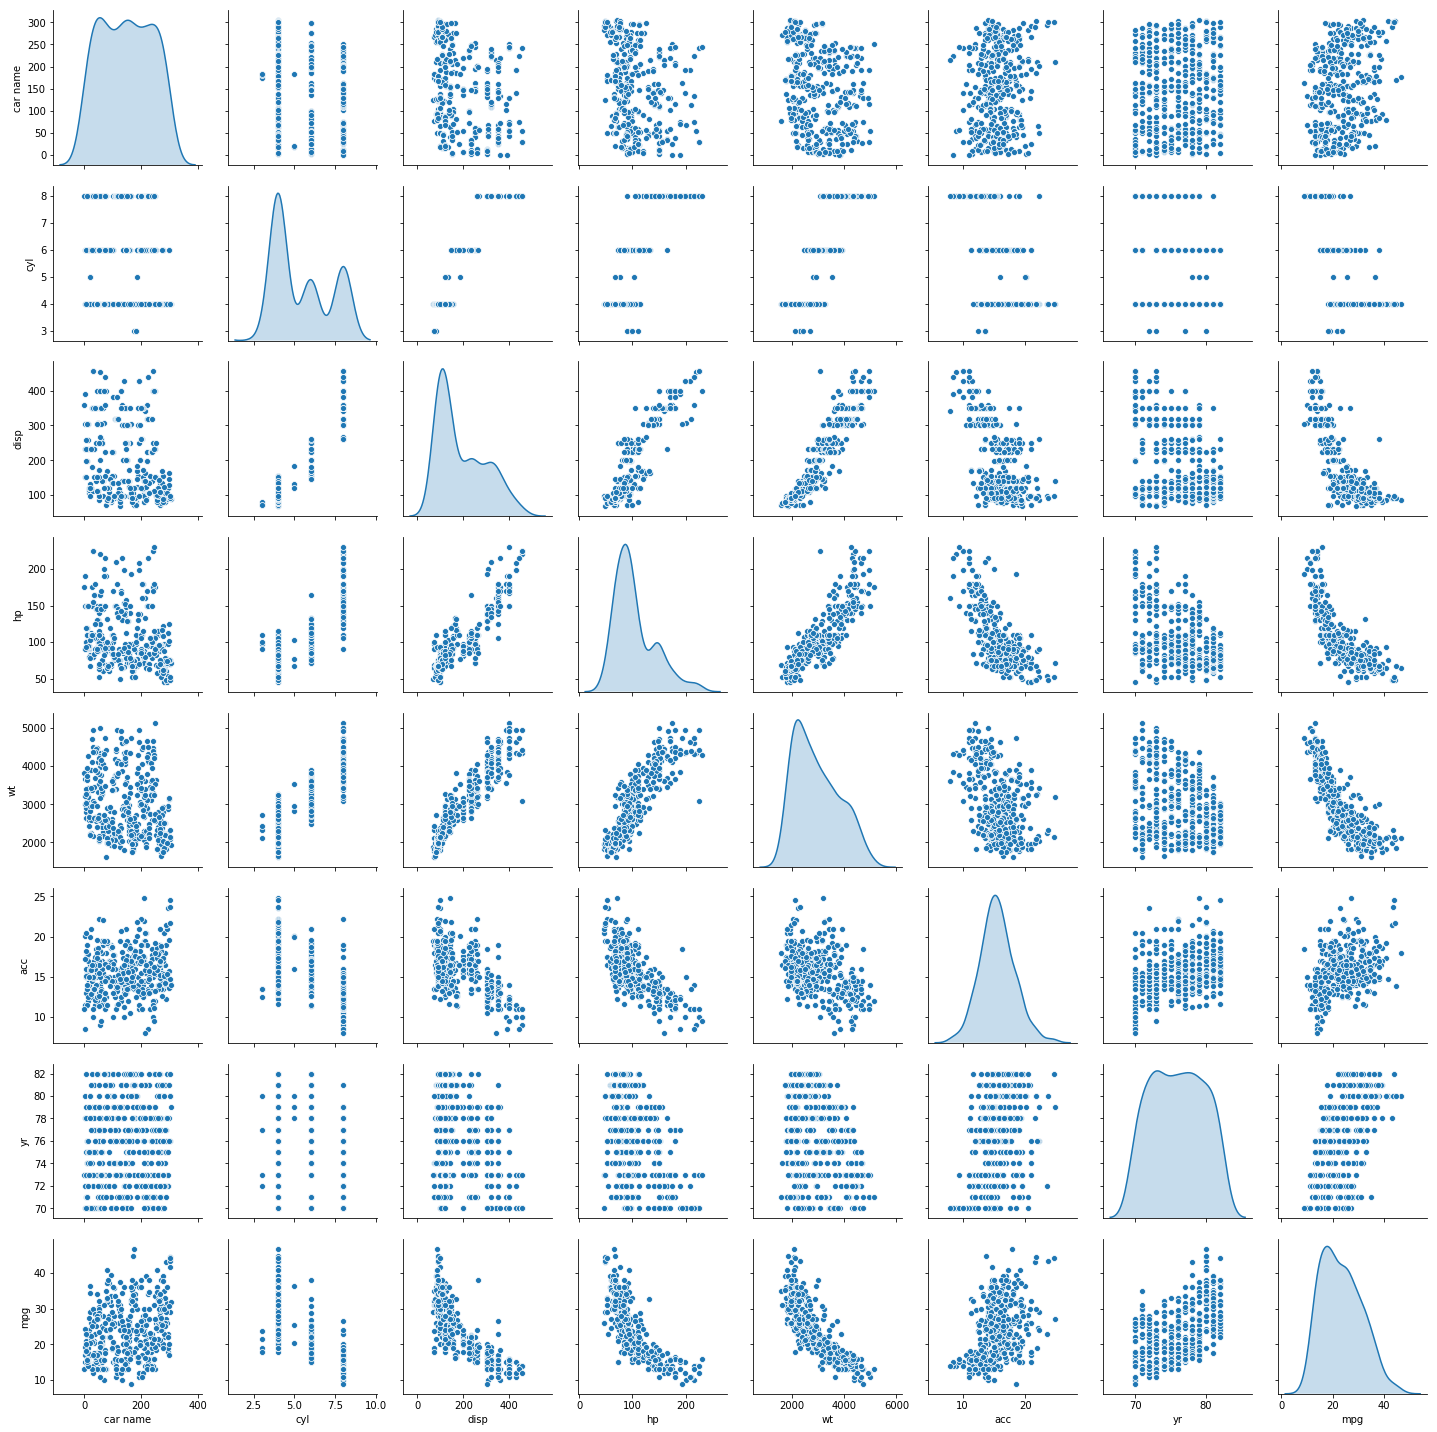

In [67]:
sns.pairplot(df,diag_kind='kde')

In [68]:
df.corr()

,car name,cyl,disp,hp,wt,acc,yr,mpg
car name,1.000000,-0.275754,-0.292064,-0.233575,-0.255247,0.128285,0.074761,0.273936
cyl,-0.275754,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
disp,-0.292064,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
hp,-0.233575,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
wt,-0.255247,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acc,0.128285,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
yr,0.074761,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
mpg,0.273936,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


### 3.Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [69]:
Cluster_Range = range( 2, 10)   
Cluster_Errors = []
for Num_Clusters in Cluster_Range:
  Clusters = KMeans(Num_Clusters, n_init = 5)
  Clusters.fit(df)
  Labels = Clusters.labels_
  Centroid = Clusters.cluster_centers_
  Cluster_Errors.append(Clusters.inertia_ )
Cluster_DataFrame = pd.DataFrame( { "Num_Clusters":Cluster_Range, "Cluster_Errors": Cluster_Errors } )
Cluster_DataFrame

,Num_Clusters,Cluster_Errors
0,2,7.730196e+07
1,3,3.719735e+07
2,4,2.198210e+07
3,5,1.665215e+07
4,6,1.320687e+07
5,7,1.065470e+07
6,8,8.540689e+06
7,9,7.618346e+06


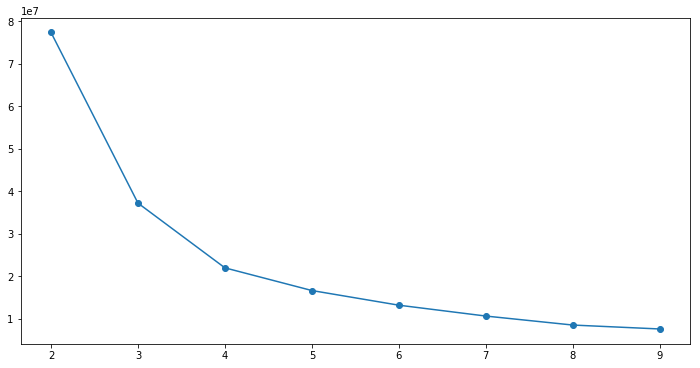

In [70]:
plt.figure(figsize=(12,6))
plt.plot(Cluster_DataFrame.Num_Clusters, Cluster_DataFrame.Cluster_Errors, marker = "o" )

#### Optimal number of clusters is 4

In [71]:
from scipy.stats import zscore
DataFrame_Z = df.apply(zscore) #converting the dataframe to z score

In [72]:
Cluster = KMeans(n_clusters = 4, random_state = 1 )
Cluster.fit(DataFrame_Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [73]:
centroids = Cluster.cluster_centers_
centroids

array([[ 0.4762086 , -0.80538161, -0.77898942, -0.53124324, -0.73644325,
         0.27726168, -0.65104117,  0.19299901],
       [ 0.21215647, -0.82450284, -0.78942423, -0.75783815, -0.7828093 ,
         0.39036529,  1.10481008,  1.19111585],
       [-0.31977049,  1.49819126,  1.50392292,  1.52168276,  1.40409797,
        -1.0861486 , -0.68832385, -1.16379715],
       [-0.48333301,  0.38707332,  0.3064296 , -0.04122342,  0.35389573,
         0.33631692,  0.10985173, -0.4818969 ]])

In [74]:
Centroid_DataFrame = pd.DataFrame(centroids, columns = list(DataFrame_Z) )
Centroid_DataFrame

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,0.476209,-0.805382,-0.778989,-0.531243,-0.736443,0.277262,-0.651041,0.192999
1,0.212156,-0.824503,-0.789424,-0.757838,-0.782809,0.390365,1.104810,1.191116
2,-0.319770,1.498191,1.503923,1.521683,1.404098,-1.086149,-0.688324,-1.163797
3,-0.483333,0.387073,0.306430,-0.041223,0.353896,0.336317,0.109852,-0.481897


In [75]:
Prediction=Cluster.predict(DataFrame_Z)
DataFrame_Z["Group"]=Prediction
DataFrame_Z.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,Group
0,-1.113745,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,-1.259185,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,0.922428,1.498191,1.196232,1.197026,0.550470,-1.658577,-1.627426,-0.706439,2
3,-1.505316,1.498191,1.061796,1.197026,0.546923,-1.295498,-1.627426,-0.962647,2
4,0.139285,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


In [76]:
DataFrame_Cluster0 = DataFrame_Z[DataFrame_Z['Group']==0]
DataFrame_Cluster1 = DataFrame_Z[DataFrame_Z['Group']==1]
DataFrame_Cluster2 = DataFrame_Z[DataFrame_Z['Group']==2]
DataFrame_Cluster3 = DataFrame_Z[DataFrame_Z['Group']==3]

In [82]:
DataFrame_Cluster0.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,Group
14,1.403502,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,-1.627426,0.062185,0
15,0.799363,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-1.627426,-0.194023,0
17,0.016219,0.320935,0.063128,-0.505678,-0.453340,0.156817,-1.627426,-0.322127,0
18,-0.599107,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,-1.627426,0.446497,0
19,1.493004,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,-1.627426,0.318393,0


In [83]:
DataFrame_Cluster1.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,Group
195,-1.091369,-0.856321,-1.041167,-1.370127,-1.105994,2.407906,-0.002721,0.702705,1
198,0.206411,-0.856321,-0.983552,-1.343932,-1.389757,0.665128,-0.002721,1.215121,1
204,-0.643859,-0.856321,-1.041167,-0.898609,-1.159200,0.519896,-0.002721,1.087017,1
216,0.184036,-0.856321,-0.916334,-0.951000,-1.094171,1.064514,0.268063,1.022965,1
217,-1.303937,-0.856321,-0.791500,-0.636655,-0.964113,-0.278877,0.268063,0.830809,1


In [84]:
DataFrame_Cluster2.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,Group
0,-1.113745,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,2
1,-1.259185,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,2
2,0.922428,1.498191,1.196232,1.197026,0.550470,-1.658577,-1.627426,-0.706439,2
3,-1.505316,1.498191,1.061796,1.197026,0.546923,-1.295498,-1.627426,-0.962647,2
4,0.139285,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,2


In [85]:
DataFrame_Cluster3.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,Group
16,-1.572443,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-1.627426,-0.706439,3
24,-1.583631,0.320935,0.053526,-0.374700,-0.381217,-0.206262,-1.627426,-0.322127,3
33,-1.583631,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-1.356642,-0.578335,3
34,0.933616,0.320935,0.303193,0.018231,0.554017,-0.024722,-1.356642,-0.962647,3
35,-1.113745,0.320935,0.543257,-0.112746,0.423960,-0.024722,-1.356642,-0.834543,3


### 4.Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

#### For Cluster0

In [78]:
# Dropping 'car name' as it doesnot help in predicting car type
X_0 = DataFrame_Cluster0.drop('car name', axis=1)
Y_0 = DataFrame_Cluster0[['car name']]
#Split X_0 and Y_0 into training and test set in 70:30 ratio
X_0_Train, X_0_Test, Y_0_Train, Y_0_Test = train_test_split(X_0, Y_0, test_size=0.30, random_state=1)
Cluster_0 = LinearRegression()
Cluster_0.fit(X_0_Train, Y_0_Train)
#coefficients
for idx, col_name in enumerate(X_0_Train.columns):
    print("The coefficient for {} is {}".format(col_name, Cluster_0.coef_[0][idx]))
#Intercepts
Intercept_0 = Cluster_0.intercept_[0]
print("\nThe intercept for Cluster_0 is {}".format(Intercept_0))

The coefficient for cyl is 1.0761784589704433
The coefficient for disp is -1.4166980679272472
The coefficient for hp is -0.32652465889592663
The coefficient for wt is 0.5345819656534118
The coefficient for acc is -0.14023515201293152
The coefficient for yr is 0.29008170216233986
The coefficient for mpg is -0.34345610726864306
The coefficient for Group is 0.0

The intercept for Cluster_0 is 0.8540053255207277


#### For Cluster1

In [79]:
X_1 = DataFrame_Cluster1.drop('car name', axis=1)
Y_1 = DataFrame_Cluster1[['car name']]
X_1_Train, X_1_Test, Y_1_Train, Y_1_Test = train_test_split(X_1, Y_1, test_size=0.30, random_state=1)
Cluster_1 = LinearRegression()
Cluster_1.fit(X_1_Train, Y_1_Train)
for idx, col_name in enumerate(X_1_Train.columns):
    print("The coefficient for {} is {}".format(col_name, Cluster_1.coef_[0][idx]))
Intercept_1 = Cluster_1.intercept_[0]
print("\nThe intercept for Cluster_1 is {}".format(Intercept_1))

The coefficient for cyl is 0.019740307770612406
The coefficient for disp is 0.0759409887588679
The coefficient for hp is -1.1226505105007958
The coefficient for wt is 0.6498542846158022
The coefficient for acc is -0.2621241574642015
The coefficient for yr is 0.1860821717116057
The coefficient for mpg is 0.3834669480096118
The coefficient for Group is 0.0

The intercept for Cluster_1 is -0.7596539890975194


#### For Cluster2

In [80]:
X_2 = DataFrame_Cluster2.drop('car name', axis=1)
Y_2 = DataFrame_Cluster2[['car name']]
X_2_Train, X_2_Test, Y_2_Train, Y_2_Test = train_test_split(X_2, Y_2, test_size=0.30, random_state=1)
Cluster_2 = LinearRegression()
Cluster_2.fit(X_2_Train, Y_2_Train)
for idx, col_name in enumerate(X_2_Train.columns):
    print("The coefficient for {} is {}".format(col_name, Cluster_2.coef_[0][idx]))
Intercept_2 = Cluster_2.intercept_[0]
print("\nThe intercept for Cluster_2 is {}".format(Intercept_2))

The coefficient for cyl is 0.0
The coefficient for disp is -0.24198965664560768
The coefficient for hp is 0.04350536204162142
The coefficient for wt is 0.39228527562120674
The coefficient for acc is -0.3198566856108652
The coefficient for yr is 0.2533289689701027
The coefficient for mpg is -0.5787656064869747
The coefficient for Group is 0.0

The intercept for Cluster_2 is -1.3778998596381618


#### For Cluster3

In [81]:
X_3 = DataFrame_Cluster3.drop('car name', axis=1)
Y_3 = DataFrame_Cluster3[['car name']]
X_3_Train, X_3_Test, Y_3_Train, Y_3_Test = train_test_split(X_3, Y_3, test_size=0.30, random_state=1)
Cluster_3 = LinearRegression()
Cluster_3.fit(X_3_Train, Y_3_Train)
for idx, col_name in enumerate(X_3_Train.columns):
    print("The coefficient for {} is {}".format(col_name, Cluster_3.coef_[0][idx]))
Intercept_3 = Cluster_3.intercept_[0]
print("\nThe intercept for Cluster_3 is {}".format(Intercept_3))

The coefficient for cyl is 1.2523080651995753
The coefficient for disp is -1.951535847741738
The coefficient for hp is -1.1819757229327925
The coefficient for wt is 1.8247566449195805
The coefficient for acc is -0.3396483079344299
The coefficient for yr is -0.12616696499456423
The coefficient for mpg is 0.0464705197764228
The coefficient for Group is 0.0

The intercept for Cluster_3 is -0.8553816108356909
